**Effect of Segmentation on Image Compression** 

Author: Tushar Rewatkar


This Python code converts colored pixel values in images to labeled images with colors having a tolerance of 20, using a predefined set of mean colors.


In [ ]:
import cv2
import numpy as np
import os

''' The code converts colored pixel values to labelled image with colors having a tolerance of 20 '''

mean_colors={0: (0, 0, 0),
 1: (0, 0, 0),
 2: (0, 0, 0),
 3: (0, 0, 0),
 4: (0, 0, 0),
 5: (0, 74, 111),
 6: (81, 0, 81),
 7: (128, 64, 128),
 8: (232, 35, 244),
 9: (160, 170, 250),
 10: (140, 150, 230),
 11: (70, 70, 70),
 12: (156, 102, 102),
 13: (153, 153, 190),
 14: (180, 165, 180),
 15: (100, 100, 150),
 16: (90, 120, 150),
 17: (153, 153, 153),
 18: (153, 153, 153),
 19: (30, 170, 250),
 20: (0, 220, 220),
 21: (35, 142, 107),
 22: (152, 251, 152),
 23: (180, 130, 70),
 24: (60, 20, 220),
 25: (0, 0, 255),
 26: (142, 0, 0),
 27: (70, 0, 0),
 28: (100, 60, 0),
 29: (90, 0, 0),
 30: (110, 0, 0),
 31: (100, 80, 0),
 32: (230, 0, 0),
 33: (32, 11, 119),
 34: (142, 0, 0)}
tolerance = 20

# input_folder = "G:/Tush/proj/gtFine/val_only_color/lindau/"
input_folder = r"C:\Users\tusha\OneDrive\Desktop\VW\mmsegmentation\output_segmentation\Q25\leftImg8bit\val\frankfurt"
output_folder = r"C:\Users\tusha\OneDrive\Desktop\VW\mmsegmentation\labelled_images\color_maps\q25\frankfurt"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

def find_nearest_mean_color(pixel_color, mean_colors, tolerance):
    min_distance = float('inf')
    nearest_class = None

    for class_label, class_color in mean_colors.items():
        distance = np.linalg.norm(np.array(pixel_color) - np.array(class_color))
        if distance < min_distance and distance <= tolerance:
            min_distance = distance
            nearest_class = class_label

    if nearest_class is None:
        nearest_class = 0  

    return nearest_class

for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):
    # if filename.endswith(".png"):
        rgba_image = cv2.imread(os.path.join(input_folder, filename), cv2.IMREAD_UNCHANGED)
        rgb_image = cv2.cvtColor(rgba_image, cv2.COLOR_RGBA2RGB)

        labeled_image = np.zeros_like(rgb_image, dtype=np.uint8)

        # Iterate through each pixel and assign the nearest class label with tolerance
        for i in range(rgb_image.shape[0]):
            for j in range(rgb_image.shape[1]):
                pixel_color = tuple(rgb_image[i, j])
                nearest_class = find_nearest_mean_color(pixel_color, mean_colors, tolerance)
                labeled_image[i, j] = nearest_class

        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, labeled_image)

print("Color labeling completed for all images.")

This Python code generates error heatmaps for a set of ground truth (gtFine) and segmented images by computing the absolute difference between their grayscale versions and applying a colormap to visualize the differences.


In [ ]:

''' ERROR HEATMAP (multiple images) '''

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the paths to the ground truth (gtFine only which ends with color.png) and segmented image folders
gtfine_folder = r"C:\Users\tusha\OneDrive\Desktop\VW\mmsegmentation\data\cityscapes\Q25\gtFine\val\frankfurt"
segmented_folder = r"C:\Users\tusha\OneDrive\Desktop\VW\mmsegmentation\output_segmentation\Q25\leftImg8bit\val\frankfurt"

output_folder = r"C:\Users\tusha\OneDrive\Desktop\VW\mmsegmentation\heatmaps"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

gtfine_images = os.listdir(gtfine_folder)
segmented_images = os.listdir(segmented_folder)

gtfine_images.sort()
segmented_images.sort()

for gt_image_name, segmented_image_name in zip(gtfine_images, segmented_images):

    gt_image_path = os.path.join(gtfine_folder, gt_image_name)
    segmented_image_path = os.path.join(segmented_folder, segmented_image_name)

    gt_image = cv2.imread(gt_image_path)
    segmented_image = cv2.imread(segmented_image_path)

    gt_gray = cv2.cvtColor(gt_image, cv2.COLOR_BGR2GRAY)
    segmented_gray = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)

    error_map = cv2.absdiff(gt_gray, segmented_gray)

    error_map_normalized = cv2.normalize(error_map, None, 0, 255, cv2.NORM_MINMAX)

    error_map_colormap = cv2.applyColorMap(error_map_normalized, cv2.COLORMAP_HOT)

    heatmap_filename = os.path.splitext(gt_image_name)[0] + "_heatmap.png"
    heatmap_path = os.path.join(output_folder, heatmap_filename)
    cv2.imwrite(heatmap_path, error_map_colormap)

    print(f"Created heatmap for {gt_image_name}")

print("Heatmap generation completed for all images.")


This Python code calculates the Intersection over Union (IoU) per label for multiple images by comparing ground truth masks to segmented images and saves the results as a DataFrame in a CSV file.


In [ ]:
''' calculating the iou perlabel for multiple images and saving it as a dataframe '''

import os
import cv2
import numpy as np
import pandas as pd

# Define the directory containing your images
image_directory = r"C:\Users\tusha\OneDrive\Desktop\VW\mmsegmentation\labelled_images\color_maps\q75\frankfurt"

# Define the directory containing the ground truth label masks
gtfine_directory = r"C:\Users\tusha\OneDrive\Desktop\VW\mmsegmentation\labelled_images\color_maps\gtfine\frankfurt"

iou_results = {}

# Function to calculate IoU for a pair of images
def calculate_iou(gt_image, seg_image):
    gtfine_image = cv2.imread(gt_image, cv2.IMREAD_GRAYSCALE)
    seg_image = cv2.imread(seg_image, cv2.IMREAD_GRAYSCALE)

    label_names = {
        0: 'unlabeled',
        1: 'ego vehicle',
        2: 'rectification border',
        3: 'out of roi',
        4: 'static',
        5: 'dynamic',
        6: 'ground',
        7: 'road',
        8: 'sidewalk',
        9: 'parking',
        10: 'rail track',
        11: 'building',
        12: 'wall',
        13: 'fence',
        14: 'guard rail',
        15: 'bridge',
        16: 'tunnel',
        17: 'pole',
        18: 'polegroup',
        19: 'traffic light',
        20: 'traffic sign',
        21: 'vegetation',
        22: 'terrain',
        23: 'sky',
        24: 'person',
        25: 'rider',
        26: 'car',
        27: 'truck',
        28: 'bus',
        29: 'caravan',
        30: 'trailer',
        31: 'train',
        32: 'motorcycle',
        33: 'bicycle',
        34: 'license plate'
    }

    iou_per_label = {}

    unique_labels = np.unique(gtfine_image)

    for label in unique_labels:
        if label == 255:  # Ignore label 255 (void/unlabeled)
            continue

        # Create binary masks for the current label in both images
        gt_mask = (gtfine_image == label).astype(np.uint8)
        seg_mask = (seg_image == label).astype(np.uint8)

        # Calculate the intersection and union between the masks
        intersection = np.logical_and(gt_mask, seg_mask)
        union = np.logical_or(gt_mask, seg_mask)

        # Calculate the IoU for the current label
        iou = np.sum(intersection) / np.sum(union)
        iou_per_label[label] = iou

    return iou_per_label

# Iterate through the images in the directory
for image_filename in os.listdir(image_directory):
    if image_filename.endswith(".jpg"):  # Assuming you are interested in JPG images
        image_path = os.path.join(image_directory, image_filename)
        gtfine_path = os.path.join(gtfine_directory, image_filename.replace("_leftImg8bit.jpg", "_gtFine_color.png"))

        if os.path.exists(gtfine_path):
            iou_result = calculate_iou(gtfine_path, image_path)
            iou_results[image_filename] = iou_result

df = pd.DataFrame.from_dict(iou_results, orient='index')
# df['Miou'] = df.apply(lambda row: np.mean([iou for iou in row if iou > 0.0]), axis=1)

df.to_csv('iou_results_75_frankfurt.csv')

print(df)

If you want to run the code please run it from next cell as above code takes huge computing power and time to Run. I have saved all images data to csv files. Please change the path to mmsegmentation\frames\{name}.

This Python code reads and preprocesses IoU results DataFrames for different cities and compression levels by converting certain values to NaN and dropping specific columns.


In [51]:

import os
import cv2
import numpy as np
import pandas as pd

df_25_l = pd.read_csv(r"C:\Users\tusha\OneDrive\Desktop\VW\mmsegmentation\frames\iou_results_25_Lindau.csv")
df_75_l = pd.read_csv(r"C:\Users\tusha\OneDrive\Desktop\VW\mmsegmentation\frames\iou_results_75_Lindau.csv")

df_25_m = pd.read_csv(r"C:\Users\tusha\OneDrive\Desktop\VW\mmsegmentation\frames\iou_results_25_munster.csv")
df_75_m = pd.read_csv(r"C:\Users\tusha\OneDrive\Desktop\VW\mmsegmentation\frames\iou_results_75_munster.csv")

df_25_f = pd.read_csv(r"C:\Users\tusha\OneDrive\Desktop\VW\mmsegmentation\frames\iou_results_25_frankfurt.csv")
df_75_f = pd.read_csv(r"C:\Users\tusha\OneDrive\Desktop\VW\mmsegmentation\frames\iou_results_75_frankfurt.csv")

df_25_l = df_25_l.apply(pd.to_numeric, errors='coerce') 
df_25_l.drop(['Unnamed: 0', '14', '30', 'Miou'], axis=1, inplace=True)
df_25_l[df_25_l < 0.09] = None

df_25_m = df_25_m.apply(pd.to_numeric, errors='coerce')
df_25_m.drop(['Unnamed: 0', '29', '30', '15', 'Miou'], axis=1, inplace=True)
df_25_m[df_25_m < 0.09] = None

df_25_f = df_25_f.apply(pd.to_numeric, errors='coerce')
df_25_f.drop(['Unnamed: 0'], axis=1, inplace=True)
df_25_f[df_25_f < 0.09] = None

df_75_l = df_75_l.apply(pd.to_numeric, errors='coerce')
df_75_l.drop(['Unnamed: 0', '14', '30', 'Miou'], axis=1, inplace=True)
df_75_l[df_75_l < 0.09] = None

df_75_m = df_75_m.apply(pd.to_numeric, errors='coerce')
df_75_m.drop(['Unnamed: 0', '29', '30', '15', 'Miou'], axis=1, inplace=True)
df_75_m[df_75_m < 0.09] = None

df_75_f = df_75_f.apply(pd.to_numeric, errors='coerce')
df_75_f.drop(['Unnamed: 0'], axis=1, inplace=True)
df_75_f[df_75_f < 0.09] = None

This Python code calculates the mean Intersection over Union (IoU) per label for different cities and compression levels, considering only values greater than a specified threshold.


In [52]:
import numpy as np
def calculate_mean_per_label(df):
    threshold = 0.05
    mean_per_label_dict = {}

    for label in df.columns:
        filtered_values = df[label][df[label] > threshold]

        if not filtered_values.empty:
            label_mean = filtered_values.mean()
            mean_per_label_dict[label] = label_mean

    return mean_per_label_dict

mean_per_label_25_l = calculate_mean_per_label(df_25_l)
mean_per_label_75_l = calculate_mean_per_label(df_75_l)
mean_per_label_25_m = calculate_mean_per_label(df_25_m)
mean_per_label_75_m = calculate_mean_per_label(df_75_m)
mean_per_label_25_f = calculate_mean_per_label(df_25_f)
mean_per_label_75_f = calculate_mean_per_label(df_75_f)

mean_25_l = np.mean(list(mean_per_label_25_l.values()))
mean_75_l = np.mean(list(mean_per_label_75_l.values()))
mean_25_m = np.mean(list(mean_per_label_25_m.values()))
mean_75_m = np.mean(list(mean_per_label_75_m.values()))
mean_25_f = np.mean(list(mean_per_label_25_f.values()))
mean_75_f = np.mean(list(mean_per_label_75_f.values()))


This Python code generates a grouped bar graph displaying Mean Intersection over Union (MIoU) values for different cities at two compression levels (Q25 and Q75) using Matplotlib and Seaborn.


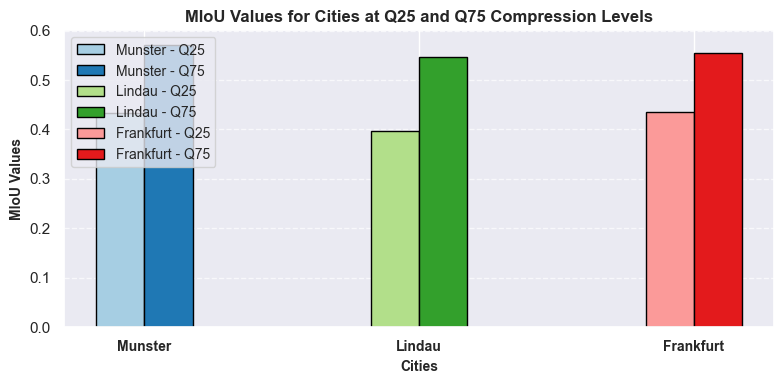

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Set Seaborn style and palette
sns.set_theme()
sns.set_palette('Paired')

# Define the cities, compression levels, and MIoU values
cities = ['Munster', 'Lindau', 'Frankfurt']
compression_levels = ['Q25', 'Q75']
miou_values = {
    'Munster': [0.43276168314776736, 0.5717560851417651],
    'Lindau': [0.39711471037837426, 0.546504833366838],
    'Frankfurt': [0.43468070124468083,  0.554365152685097]
}

# Set the positions for the bars
x = np.arange(len(cities)) * len(compression_levels)
width = 0.35  # Width of the bars

# Create the bar graph
fig, ax = plt.subplots(figsize=(8, 4))
for i, city in enumerate(cities):
    miou_city = miou_values[city]
    ax.bar(x[i] - width/2, miou_city[0], width, label=f'{city} - Q25', edgecolor='black')
    ax.bar(x[i] + width/2, miou_city[1], width, label=f'{city} - Q75', edgecolor='black')

# Set the labels, title, and legend
ax.set_xlabel('Cities', fontsize=10, fontweight='bold')  # Adjust fontsize as needed
ax.set_ylabel('MIoU Values', fontsize=10, fontweight='bold')  # Adjust fontsize as needed
ax.set_title('MIoU Values for Cities at Q25 and Q75 Compression Levels', fontsize=12, fontweight='bold')  # Adjust fontsize as needed
ax.set_xticks(x)
ax.set_xticklabels(cities, fontsize=10, fontweight='bold')  # Adjust fontsize as needed
ax.legend(fontsize=10, loc='upper left')  # Adjust fontsize as needed
# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar graph
plt.tight_layout()
plt.show()

This Python code combines and preprocesses Intersection over Union (IoU) results from multiple DataFrames for different cities and compression levels, filtering and organizing the data per label for further analysis.


In [66]:
unique_columns_df_25_l = df_25_l.columns.tolist()
unique_columns_df_25_m = df_25_m.columns.tolist()
unique_columns_df_25_f = df_25_f.columns.tolist()

merged_unique_columns = list(set(unique_columns_df_25_l + unique_columns_df_25_m + unique_columns_df_25_f))

all_column_names = set(df_25_l.columns) | set(df_25_m.columns) | set(df_25_f.columns)
data_dict_25 = {}

# Iterate through the unique column names
for col_name in all_column_names:
    # Check if the column exists in all three DataFrames
    if col_name in df_25_l.columns and col_name in df_25_m.columns and col_name in df_25_f.columns:
        values_25_l = df_25_l[col_name][(df_25_l[col_name].notna()) & (df_25_l[col_name] >= 0.1)].tolist()
        values_25_m = df_25_m[col_name][(df_25_m[col_name].notna()) & (df_25_m[col_name] >= 0.1)].tolist()
        values_25_f = df_25_f[col_name][(df_25_f[col_name].notna()) & (df_25_f[col_name] >= 0.1)].tolist()

        all_values = values_25_l + values_25_m + values_25_f
        data_dict_25[col_name] = all_values

label_names = {
    '0': 'unlabeled',
    '1': 'ego vehicle',
    '2': 'rectification border',
    '3': 'out of roi',
    '4': 'static',
    '5': 'dynamic',
    '6': 'ground',
    '7': 'road',
    '8': 'sidewalk',
    '9': 'parking',
    '10': 'rail track',
    '11': 'building',
    '12': 'wall',
    '13': 'fence',
    '14': 'guard rail',
    '15': 'bridge',
    '16': 'tunnel',
    '17': 'pole',
    '18': 'polegroup',
    '19': 'traffic light',
    '20': 'traffic sign',
    '21': 'vegetation',
    '22': 'terrain',
    '23': 'sky',
    '24': 'person',
    '25': 'rider',
    '26': 'car',
    '27': 'truck',
    '28': 'bus',
    '29': 'caravan',
    '30': 'trailer',
    '31': 'train',
    '32': 'motorcycle',
    '33': 'bicycle',
    '34': 'license plate'
}
updated_data_dict_25 = {}

# Iterate through the merged unique column names
for col_name, values in data_dict_25.items():
    label_name = label_names.get(col_name, col_name)  # Get the label name or use the original key if not found
    updated_data_dict_25[label_name] = values

unique_columns_df_75_l = df_75_l.columns.tolist()
unique_columns_df_75_m = df_75_m.columns.tolist()
unique_columns_df_75_f = df_75_f.columns.tolist()

merged_unique_columns = list(set(unique_columns_df_75_l + unique_columns_df_75_m + unique_columns_df_75_f))

all_column_names = set(df_75_l.columns) | set(df_75_m.columns) | set(df_75_f.columns)
data_dict_75 = {}

# Iterate through the unique column names
for col_name in all_column_names:
    # Check if the column exists in all three DataFrames
    if col_name in df_75_l.columns and col_name in df_75_m.columns and col_name in df_75_f.columns:
        values_75_l = df_75_l[col_name][(df_75_l[col_name].notna()) & (df_75_l[col_name] >= 0.1)].tolist()
        values_75_m = df_75_m[col_name][(df_75_m[col_name].notna()) & (df_75_m[col_name] >= 0.1)].tolist()
        values_75_f = df_75_f[col_name][(df_75_f[col_name].notna()) & (df_75_f[col_name] >= 0.1)].tolist()

        all_values = values_75_l + values_75_m + values_75_f
        data_dict_75[col_name] = all_values

updated_data_dict_75 = {}

# Iterate through the merged unique column names
for col_name, values in data_dict_75.items():
    label_name = label_names.get(col_name, col_name)  # Get the label name or use the original key if not found
    updated_data_dict_75[label_name] = values

This Python code creates a box plot to compare Intersection over Union (IoU) values for selected labels at Q75 and Q25 compression levels, using custom colors for the box plots.


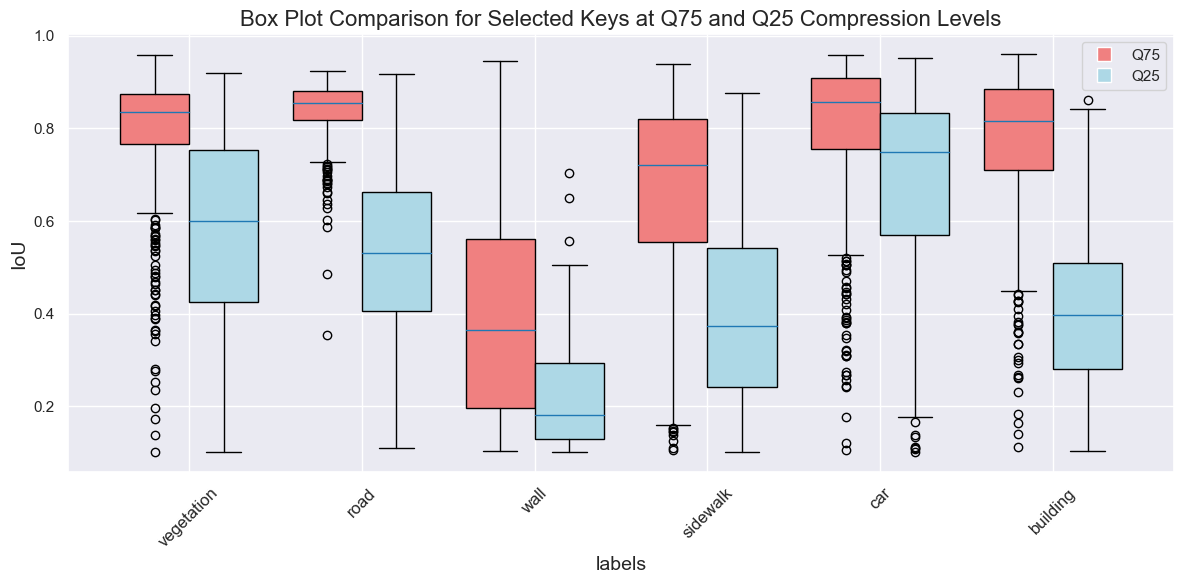

In [71]:
selected_keys = ['vegetation', 'road', 'wall', 'sidewalk', 'car', 'building']

data_q75 = {key: updated_data_dict_75[key] for key in selected_keys}
data_q25 = {key: updated_data_dict_25[key] for key in selected_keys}

data_list_q75 = [data_q75[key] for key in selected_keys]
data_list_q25 = [data_q25[key] for key in selected_keys]

labels = selected_keys

fig, ax = plt.subplots(figsize=(12, 6))

color_q75 = 'lightcoral'
color_q25 = 'lightblue'

box1 = ax.boxplot(data_list_q75, positions=range(len(selected_keys)), widths=0.4, patch_artist=True, boxprops=dict(facecolor=color_q75), labels=[f'{key} - Q75' for key in labels])
box2 = ax.boxplot(data_list_q25, positions=[pos + 0.4 for pos in range(len(selected_keys))], widths=0.4, patch_artist=True, boxprops=dict(facecolor=color_q25), labels=[f'{key} - Q25' for key in labels])

ax.set_xlabel('labels', fontsize=14)
ax.set_ylabel('IoU', fontsize=14)
ax.set_title('Box Plot Comparison for Selected Keys at Q75 and Q25 Compression Levels', fontsize=16)
ax.set_xticks([pos + 0.2 for pos in range(len(selected_keys))])
ax.set_xticklabels([f'{key}' for key in labels], fontsize=12, rotation=45)

legend_elements = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color_q75, markersize=10, label='Q75', lw=0),
                   plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color_q25, markersize=10, label='Q25', lw=0)]
ax.legend(handles=legend_elements, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

This Python code calculates and visualizes the mean Intersection over Union (IoU) values for each label across three cities at different compression levels (Q25 and Q75) using line plots with custom markers and colors.


In [70]:
mean_dict_25 = {}

for key, values in updated_data_dict_25.items():
    if values:  
        mean_value = sum(values) / len(values)
        mean_dict_25[key] = mean_value

mean_df_25 = pd.DataFrame(list(mean_dict_25.items()), columns=['Key', 'Mean'])

# print(mean_df_25)


#### Q75
mean_dict_75 = {}

for key, values in updated_data_dict_75.items():
    if values:  
        mean_value = sum(values) / len(values)
        mean_dict_75[key] = mean_value

# Convert the mean_dict to a DataFrame (optional)
mean_df_75 = pd.DataFrame(list(mean_dict_75.items()), columns=['Key', 'Mean'])

# print(mean_df_75)

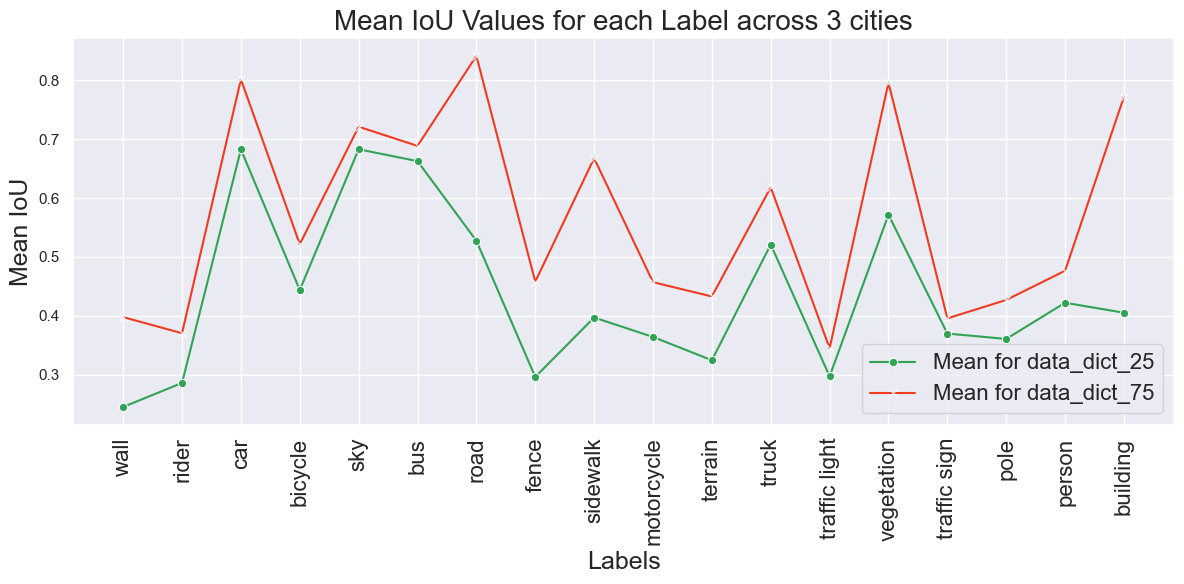

In [69]:

## plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.lineplot(data=mean_df_25, x='Key', y='Mean', label='Mean for data_dict_25', marker='o', color='#31a354')

sns.lineplot(data=mean_df_75, x='Key', y='Mean', label='Mean for data_dict_75', marker='x', color='#f03b20')

plt.xlabel('Labels', fontsize=18)
plt.ylabel('Mean IoU', fontsize=18)
plt.title('Mean IoU Values for each Label across 3 cities', fontsize=20)
plt.xticks(rotation=90, fontsize=16)  
plt.legend(fontsize=16)  

plt.grid(True)
plt.tight_layout()
plt.show()

**References**

1) https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py
2) https://www.kaggle.com/code/levusik/semantic-segmentation-pytorch-unet-enet-esnet#Introduction
3) https://www.kaggle.com/code/tr1gg3rtrash/car-driving-segmentation-unet-from-scratch
